Directorio actual: /home/jennifer/Documentos/cuarto_ano/EIA/exoplanet-classifier-comparison-ML/notebooks


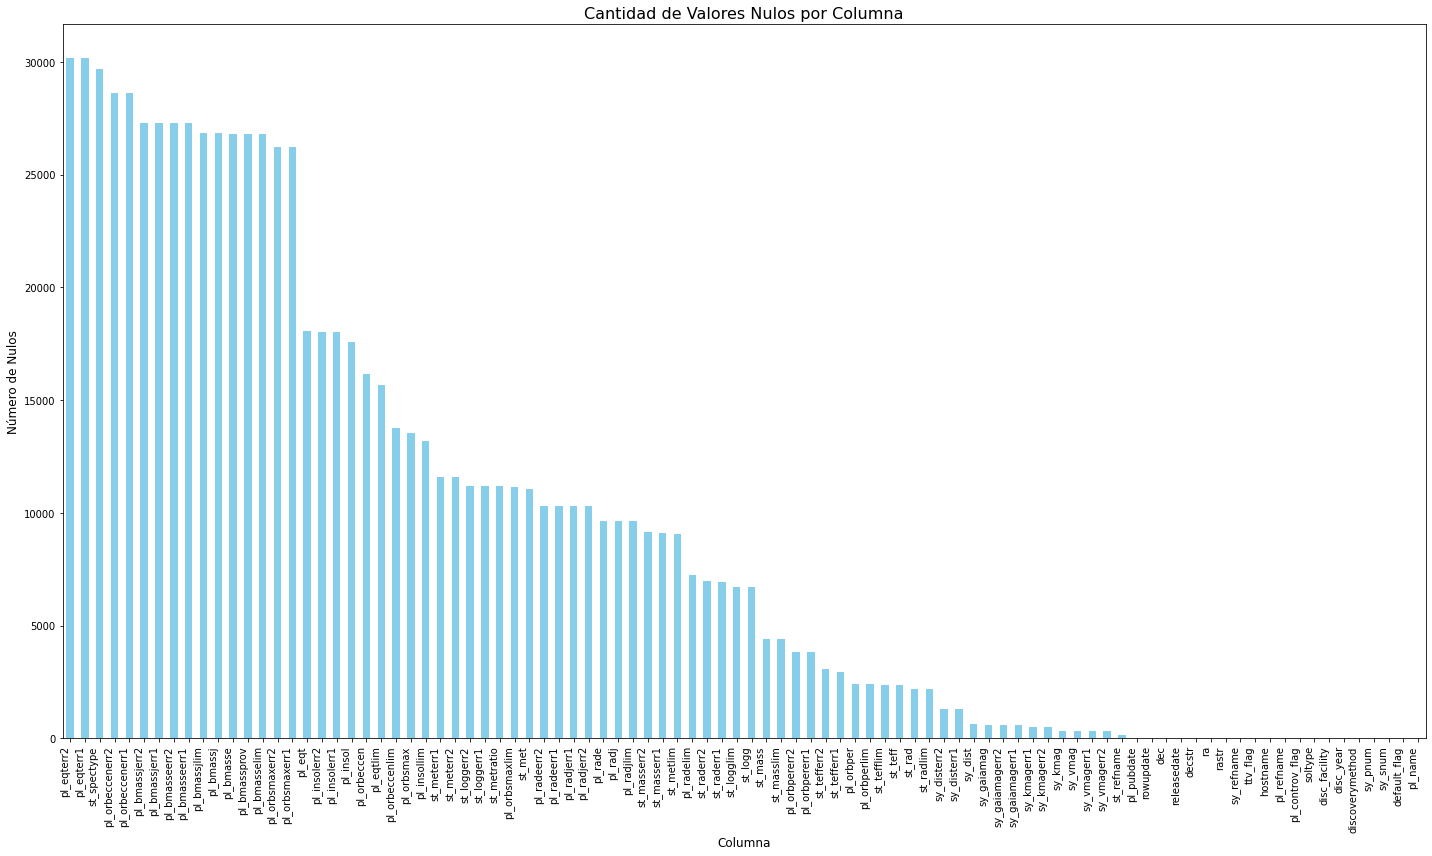

Dimensiones originales: (31532, 92)
Dimensiones después de limpiar: (31532, 39)

Columnas restantes:
39
--- Estadísticas de nulos por fila ---
count    31532.000000
mean         5.674331
std          4.900406
min          0.000000
25%          0.000000
50%          6.000000
75%         10.000000
max         28.000000
dtype: float64 39


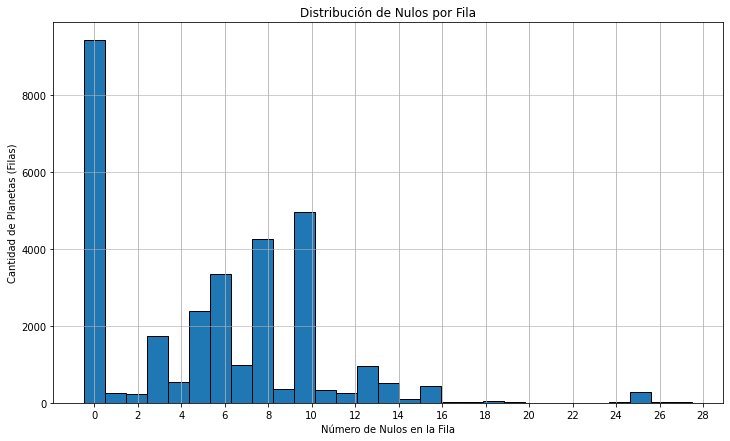

Umbral >16 nulos: Se conservan 31124 de 31532 filas.
Umbral >10 nulos: Se conservan 28518 de 31532 filas.


/tmp/ipykernel_7545/878303390.py:102: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(df_limpio[col].median(), inplace=True)
/tmp/ipykernel_7545/878303390.py:102: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac


DataFrame después de rellenar con KNNImputer:
  hostname  sy_snum  sy_pnum  discoverymethod              soltype  \
0   11 Com      2.0      1.0  Radial Velocity  Published Confirmed   
1   11 Com      2.0      1.0  Radial Velocity  Published Confirmed   
2   11 Com      2.0      1.0  Radial Velocity  Published Confirmed   
3   11 UMi      1.0      1.0  Radial Velocity  Published Confirmed   
4   11 UMi      1.0      1.0  Radial Velocity  Published Confirmed   

                                          pl_refname   pl_orbper  \
0  <a refstr=TENG_ET_AL__2023 href=https://ui.ads...  323.210000   
1  <a refstr=LIU_ET_AL__2008 href=https://ui.adsa...  326.030000   
2  <a refstr=KUNITOMO_ET_AL__2011 href=https://ui...    8.951617   
3  <a refstr=DOLLINGER_ET_AL__2009 href=https://u...  516.220000   
4  <a refstr=STASSUN_ET_AL__2017 href=https://ui....  516.219970   

   pl_orbpererr1  pl_orbpererr2  pl_orbperlim  ...  sy_vmagerr2  sy_kmag  \
0       0.060000      -0.050000           0.0  

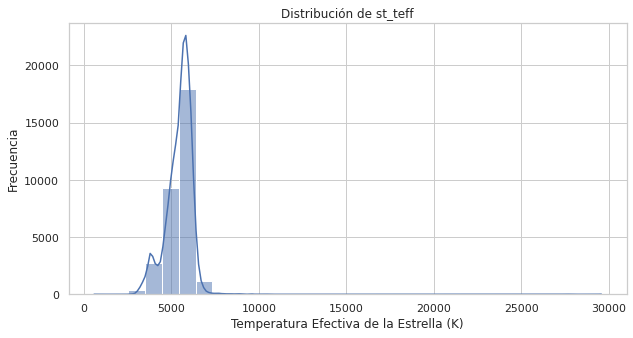

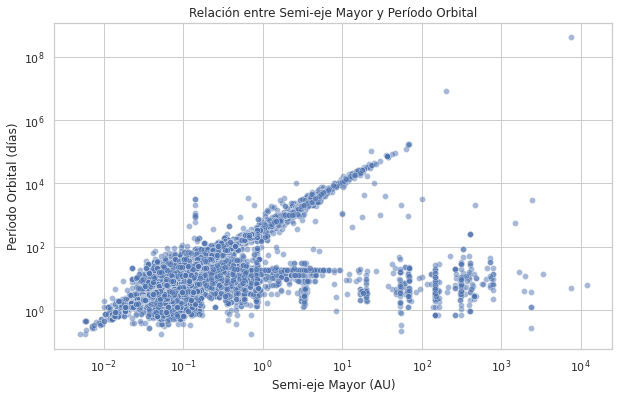

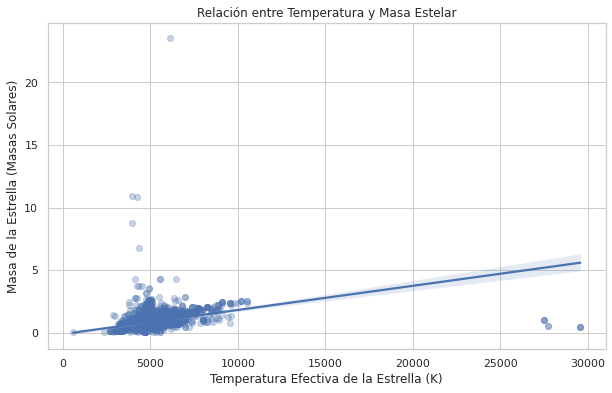


Distribución de la Variable Objetivo (is_confirmed):
is_confirmed
0    16248
1    12200
Name: count, dtype: int64


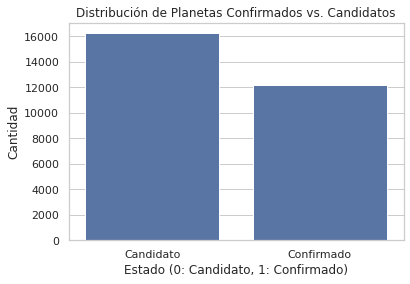

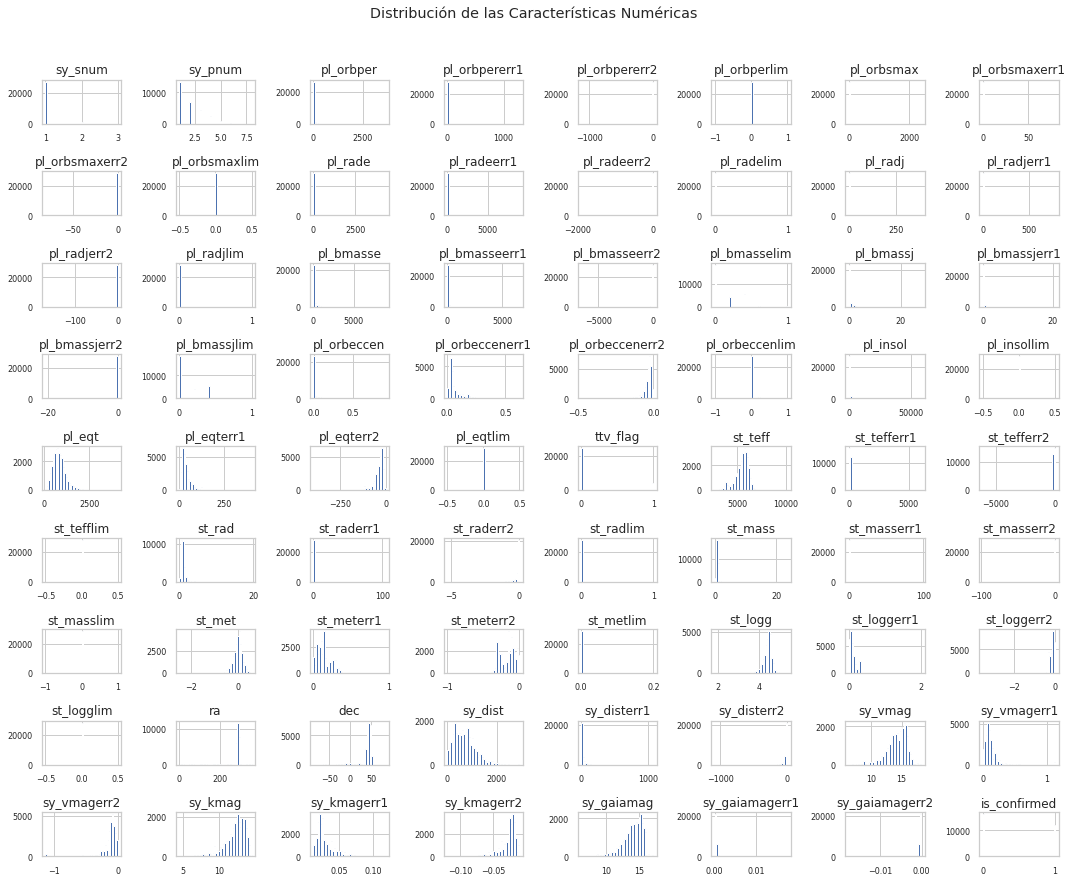

/tmp/ipykernel_7545/1294540956.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Candidato', 'Confirmado'])
/tmp/ipykernel_7545/1294540956.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Candidato', 'Confirmado'])
/tmp/ipykernel_7545/1294540956.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Candidato', 'Confirmado'])
/tmp/ipykernel_7545/1294540956.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Candidato', 'Confirmado'])


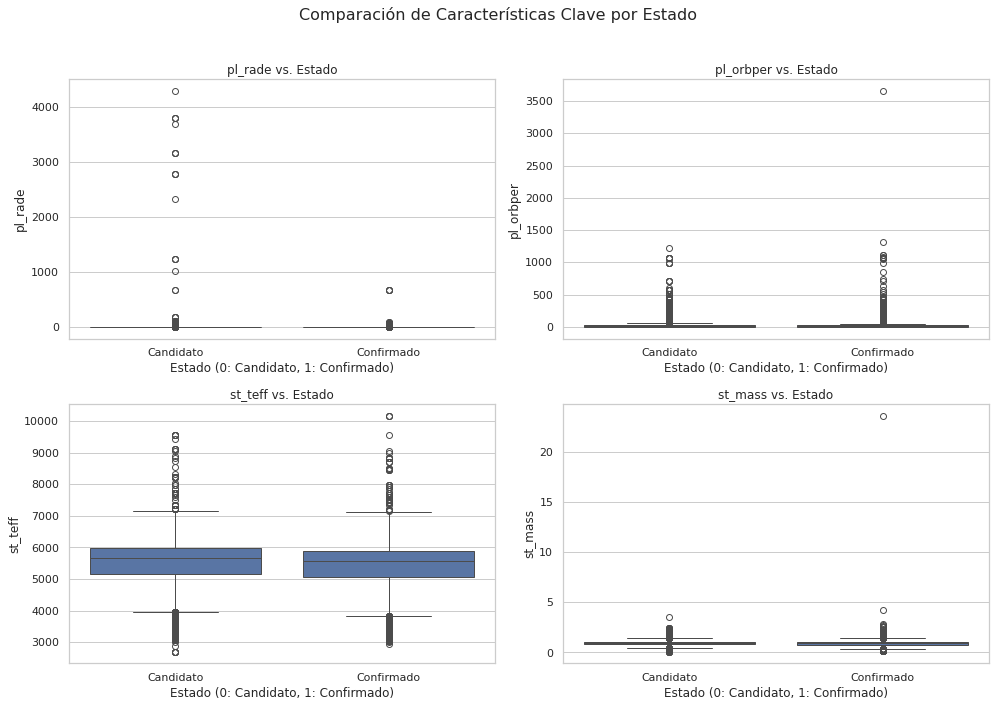

In [ ]:
import sys
import os

# Obtener el directorio actual 
current_dir = os.getcwd()  
print(f"Directorio actual: {current_dir}")
# Subir un nivel (si estás en )
project_root = os.path.dirname(current_dir)

sys.path.append(project_root)

from src.data.preprocessing import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=load_data()

df_final = df[df['discoverymethod'] == 'Transit'].copy()

df_final['is_confirmed'] = df_final['soltype'].apply(
        lambda x: 1 if 'Confirmed' in x else 0
    )

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) 

columna_a_graficar = 'st_teff'

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x=columna_a_graficar, kde=True, bins=30) # kde=True añade una curva de densidad
plt.title(f'Distribución de {columna_a_graficar}')
plt.xlabel('Temperatura Efectiva de la Estrella (K)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pl_orbsmax', y='pl_orbper', alpha=0.5) # alpha para ver puntos superpuestos
plt.title('Relación entre Semi-eje Mayor y Período Orbital')
plt.xlabel('Semi-eje Mayor (AU)')
plt.ylabel('Período Orbital (días)')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='st_teff', y='st_mass', scatter_kws={'alpha':0.3})
plt.title('Relación entre Temperatura y Masa Estelar')
plt.xlabel('Temperatura Efectiva de la Estrella (K)')
plt.ylabel('Masa de la Estrella (Masas Solares)')
plt.show()

print("\nDistribución de la Variable Objetivo (is_confirmed):")
print(df_final['is_confirmed'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='is_confirmed', data=df_final)
plt.title('Distribución de Planetas Confirmados vs. Candidatos')
plt.xlabel('Estado (0: Candidato, 1: Confirmado)')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Candidato', 'Confirmado'])
plt.show()

features_numericas = df_final.select_dtypes(include=np.number)

features_numericas.hist(figsize=(15, 12), bins=50, xlabelsize=8, ylabelsize=8)
plt.suptitle("Distribución de las Características Numéricas", y=1.02)
plt.tight_layout()
plt.show()

features_clave = ['pl_rade', 'pl_orbper', 'st_teff', 'st_mass']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparación de Características Clave por Estado', fontsize=16)

for i, feature in enumerate(features_clave):
    row, col = i // 2, i % 2
    sns.boxplot(x='is_confirmed', y=feature, data=df_final, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. Estado')
    axes[row, col].set_xlabel('Estado (0: Candidato, 1: Confirmado)')
    axes[row, col].set_xticklabels(['Candidato', 'Confirmado'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




